# 준비

In [ ]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 불러오기

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()

print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
type(iris)

sklearn.utils._bunch.Bunch

# 데이터 준비

### 독립변수 살펴보기

In [10]:
feature_name = iris.feature_names
feature = iris.data

print(feature_name)
type(feature)  # feature는 numpy ndarray 
print(feature.dtype)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
float64


### 종속변수 살펴보기

In [11]:
target_name = iris.target_names
target = iris.target

print(target_name)
print(target.dtype)

['setosa' 'versicolor' 'virginica']
int64


### 데이터 설명보기

In [12]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### 데이터프레임으로 변환

In [15]:
df_iris = pd.DataFrame(feature, columns= feature_name)
df_iris['species'] = target

df_iris.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


# 데이터 탐색 (EDA)

### 데이터 기본정보

In [16]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [17]:
## 종속변수가 치우치진 않았는지 확인
df_iris['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

### 산점도 그려서 확인해보기

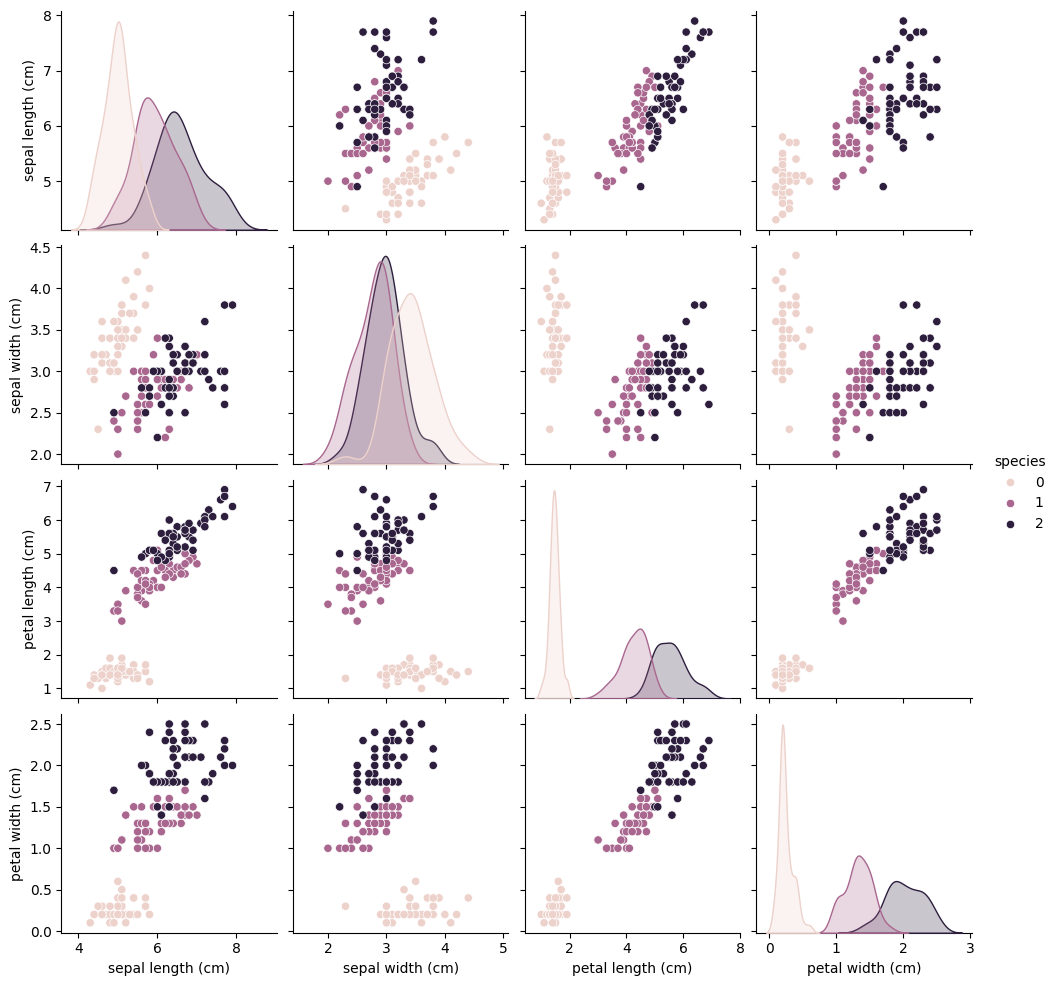

In [19]:
sns.pairplot(data=df_iris, hue='species')

# 데이터 전처리

### 일반 데이터 분할

In [20]:
X = df_iris.drop(['species'], axis=1).copy()
y = df_iris['species']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [22]:
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

species
2    42
1    40
0    38
Name: count, dtype: int64
species
0    12
1    10
2     8
Name: count, dtype: int64


### 균등하게 분할(층화추출)

In [23]:
X_s = df_iris.drop(['species'], axis=1).copy()
y_s = df_iris['species']

from sklearn.model_selection import train_test_split

Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_s, y_s, test_size=0.2, stratify=y_s)

print(Xs_train.shape, Xs_test.shape, ys_train.shape, ys_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [24]:
print(pd.Series(ys_train).value_counts())
print(pd.Series(ys_test).value_counts())

species
2    40
0    40
1    40
Name: count, dtype: int64
species
1    10
2    10
0    10
Name: count, dtype: int64


# 데이터 분석

### 모델 생성 및 훈련

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtcmodel = DecisionTreeClassifier()

dtcmodel.fit(Xs_train, ys_train)

DecisionTreeClassifier()

# 평가

### 예측

In [74]:
predict = dtcmodel.predict(Xs_test)

print(f'예측 값 : {predict}')
print(f'실제 값 : {ys_test.values}')
type(ys_test)

예측 값 : [1 2 0 0 2 1 0 1 1 0 0 1 0 2 2 1 0 1 2 2 0 2 1 1 0 1 1 1 0 2]
실제 값 : [1 2 0 0 2 1 0 1 1 0 0 1 0 2 2 1 0 1 2 2 0 2 2 1 0 1 1 2 0 2]


pandas.core.series.Series

### 평가

In [75]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ys_test, predict)
print(f'예측 정확도 : {accuracy:.2f}')

예측 정확도 : 0.93


In [76]:
from sklearn.metrics import classification_report
print(classification_report(ys_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



### 시각화해서 확인하기

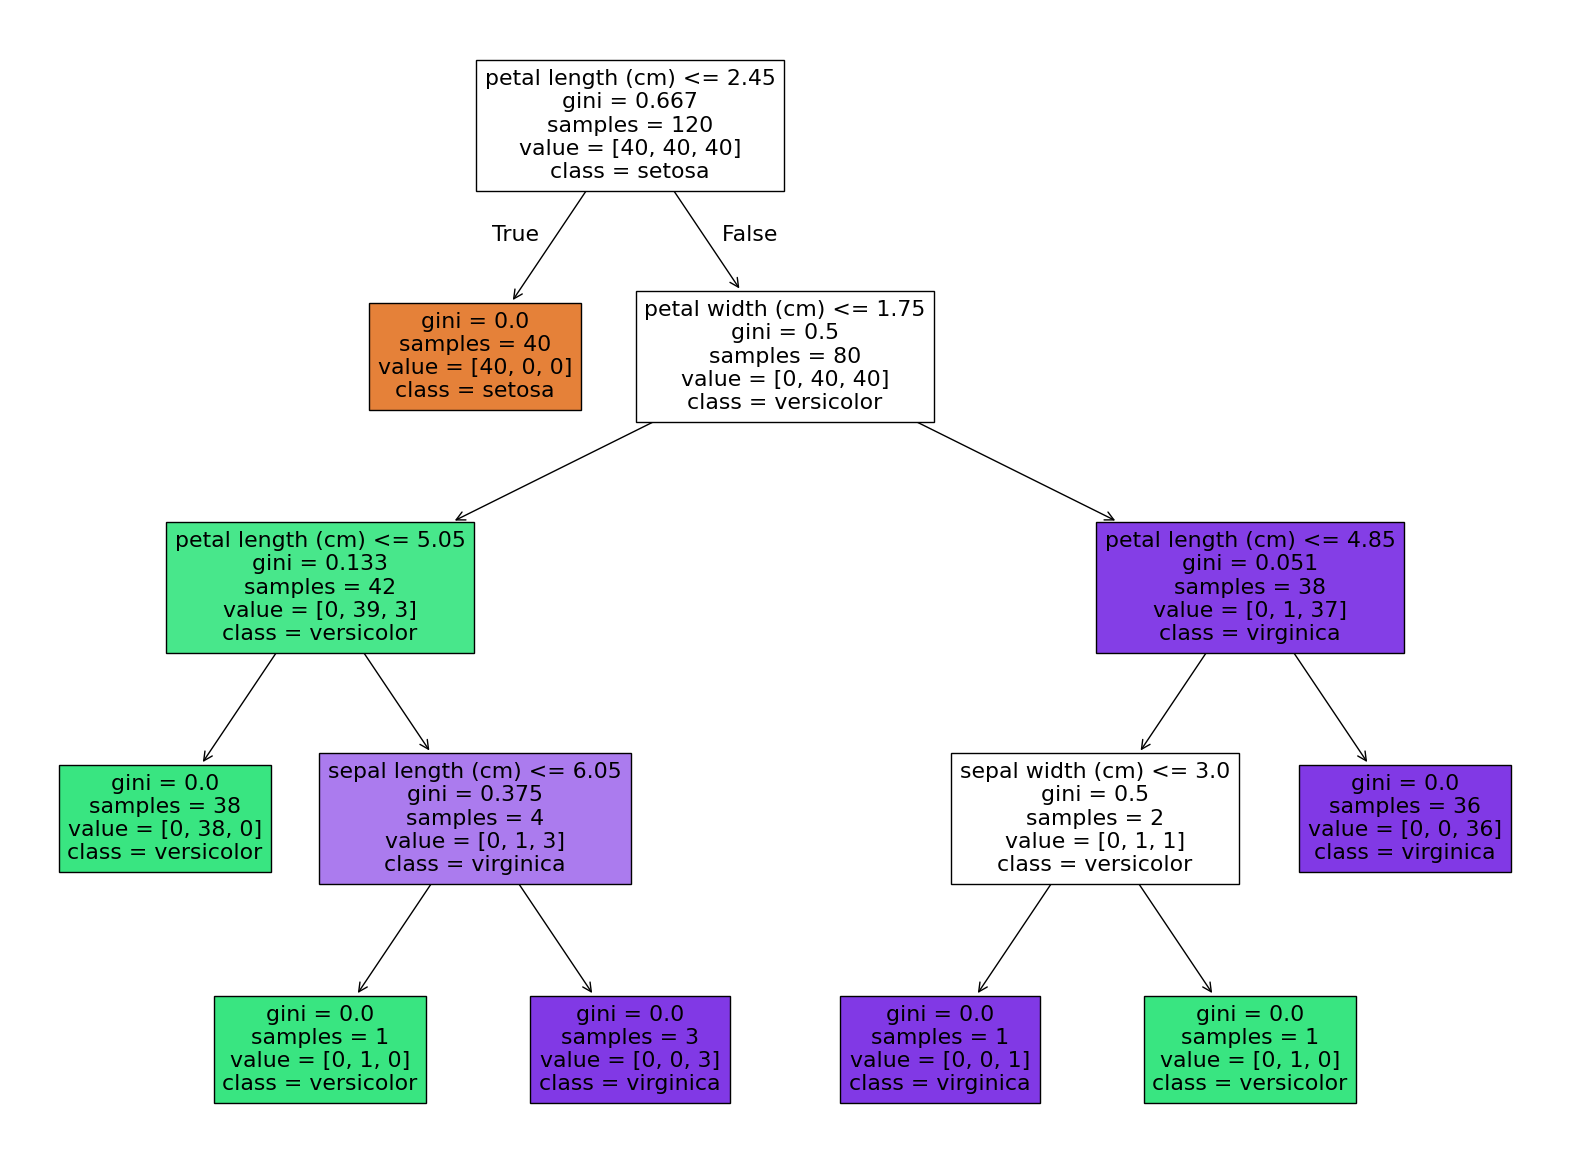

In [77]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(dtcmodel, feature_names=feature_name, class_names=target_name, filled=True);

In [78]:
print(dtcmodel.get_depth())

4


### 특성의 중요도

[0.01875    0.0125     0.06273496 0.90601504]


<Axes: >

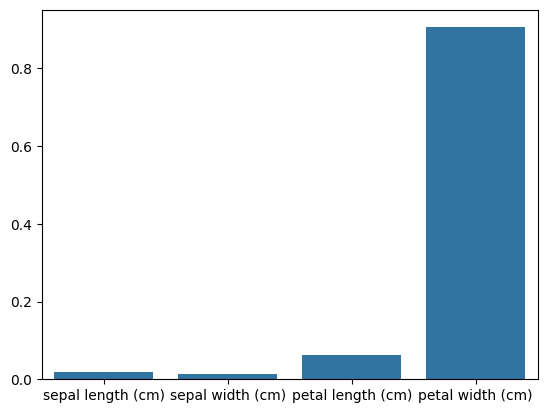

In [41]:
print(dtcmodel.feature_importances_)

sns.barplot(x=feature_name, y=dtcmodel.feature_importances_)

# 교차검증을 이용한 검증

### KFold 교차검증

In [43]:
type(X_train)

pandas.core.frame.DataFrame

In [64]:
# 객체 생성

kfmodel = DecisionTreeClassifier()

from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True)

# 훈련-예측-평가 + 정확도의 평균 계산

cv_scores =[]
for train_idx, test_idx in kf.split(X_train) :
    Xf_train, yf_train = X_train.iloc[train_idx], y_train.iloc[train_idx]
    Xf_test, yf_test = X_train.iloc[test_idx], y_train.iloc[test_idx]

    kfmodel.fit(Xf_train, yf_train)
    pred = kfmodel.predict(Xf_test)
    accuracy = accuracy_score(yf_test, pred)
    print(f'accuracy : {accuracy}')
    cv_scores.append(accuracy)

print(f'cv_scores : {np.round(cv_scores, 4)}')
print(f'cv_scores_mean : {np.mean(cv_scores):.4f}')

kf_pred = kfmodel.predict(X_test)
print(f'일반KFold 정확도 : {accuracy_score(y_test, kf_pred)}')

accuracy : 0.9166666666666666
accuracy : 1.0
accuracy : 0.9583333333333334
accuracy : 1.0
accuracy : 0.9583333333333334
cv_scores : [0.9167 1.     0.9583 1.     0.9583]
cv_scores_mean : 0.9667
일반KFold 정확도 : 0.9666666666666667


In [70]:
print(kfmodel.get_depth())

4


### 층화추출 KFold

In [66]:
skfmodel = DecisionTreeClassifier()

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)

cvs_scores= []
for tr_idx, val_idx in skf.split(X_train, y_train) :
    Xfs_train, yfs_train = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    Xfs_test, yfs_test = X_train.iloc[val_idx], y_train.iloc[val_idx]

    skfmodel.fit(Xfs_train, yfs_train)
    predskf = skfmodel.predict(Xfs_test)
    accuracyskf = accuracy_score(yfs_test, predskf)
    cvs_scores.append(accuracyskf)

print(f'cv_scores : {np.round(cvs_scores, 4)}')
print(f'cv_scores_mean : {np.mean(cvs_scores):.4f}')

skf_pred = skfmodel.predict(X_test)
print(f'층화KFold 정확도 : {accuracy_score(y_test, skf_pred)}')

cv_scores : [1.     0.9583 0.8333 0.9583 1.    ]
cv_scores_mean : 0.9500
층화KFold 정확도 : 0.9666666666666667


In [71]:
print(skfmodel.get_depth())

4


### 쉽게 평가값 얻기 

In [67]:
easymodel = DecisionTreeClassifier()

from sklearn.model_selection import cross_val_score
cv_easy_scores = cross_val_score(easymodel, X=X_train, y=y_train, scoring='accuracy', cv=skf)

print(f'cv_scores : {np.around(cv_easy_scores, 4)}')
print(f'cv_scores_mean : {cv_easy_scores.mean():.4f}')

easymodel.fit(X_train, y_train)

cv_scores : [0.9583 1.     1.     0.9167 0.9167]
cv_scores_mean : 0.9583


DecisionTreeClassifier()

### 최종 평가

In [68]:

easy_pred = easymodel.predict(X_test)

print(f'쉬운층화KFold 정확도 : {accuracy_score(y_test, easy_pred)}')

쉬운층화KFold 정확도 : 0.9666666666666667


In [72]:
print(easymodel.get_depth())

4


# 하이퍼파라미터 튜닝

In [82]:
modelhp = DecisionTreeClassifier()

# 하이퍼파라미터 값 입력
parameters = {'max_depth' : [3,4,5], 'min_samples_split' : [2,4]}

# GridSearchCV 객체 생성 
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(modelhp, param_grid=parameters, cv=kf, refit=True) 
    # refit=True : 최적의 하이퍼파라미터를 찾으면 이를 사용해 모델 재학습

# 학습
gscv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_split': [2, 4]})

In [83]:
display(pd.DataFrame(gscv.cv_results_))
print(f'최적의 파라미터 : {gscv.best_params_}')
print(f'최고 정확도 : {gscv.best_score_:.4f}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001690,0.000411,0.001364,0.000355,3,2,"{'max_depth': 3, 'min_samples_split': 2}",1.000000,0.958333,1.000000,0.916667,1.0,0.975000,0.033333,1
1,0.001306,0.000280,0.001086,0.000229,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.958333,0.958333,1.000000,0.916667,1.0,0.966667,0.031180,4
2,0.001063,0.000049,0.000796,0.000062,4,2,"{'max_depth': 4, 'min_samples_split': 2}",1.000000,0.958333,1.000000,0.916667,1.0,0.975000,0.033333,1
3,0.000989,0.000013,0.000744,0.000018,4,4,"{'max_depth': 4, 'min_samples_split': 4}",1.000000,0.958333,1.000000,0.916667,1.0,0.975000,0.033333,1
4,0.001247,0.000160,0.000990,0.000149,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.958333,0.958333,0.916667,0.916667,1.0,0.950000,0.031180,6
5,0.001069,0.000095,0.000845,0.000117,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.958333,0.958333,1.000000,0.916667,1.0,0.966667,0.031180,4


최적의 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
최고 정확도 : 0.9750


In [84]:
# 최종 모델 
best_model = gscv.best_estimator_

# 예측
pred_gscv = best_model.predict(X_test)

# 평가
from sklearn.metrics import accuracy_score
accuracy_gscv = accuracy_score(y_test, pred_gscv)
print(f'테스트 정확도 : {accuracy_gscv:.4f}')

테스트 정확도 : 0.9667


데이터양이 너무 많은 빅데이터의 경우 GSCV에 KF까지 해서 돌리면 너무 힘드므로
학습 데이터에서 일부를 추출해서 하기도 함 